In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("data.csv") 

In [12]:
df.shape

(511, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [14]:
df.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [15]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
# RM col has % null values , so  fill the null with median 
missing_rm_values = df[df['RM'].isnull()].index # check index of null values
print(missing_rm_values)

Index([10, 35, 63, 96, 135], dtype='int64')


In [17]:
df['RM'].fillna(df['RM'].median(),inplace= True)# replace with null
df.loc[missing_rm_values]

C:\Users\Dell\AppData\Local\Temp\ipykernel_14204\216486063.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RM'].fillna(df['RM'].median(),inplace= True)# replace with null


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.22489,12.5,7.87,0,0.524,6.209,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
35,0.06417,0.0,5.96,0,0.499,6.209,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
63,0.12650,25.0,5.13,0,0.453,6.209,43.4,7.9809,8,284,19.7,395.58,9.50,25.0
96,0.11504,0.0,2.89,0,0.445,6.209,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
135,0.55778,0.0,21.89,0,0.624,6.209,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [18]:
# check duplicate values
df.duplicated().sum()


0

In [19]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.286820,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.700386,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.887500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.627000,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


<function matplotlib.pyplot.show(close=None, block=None)>

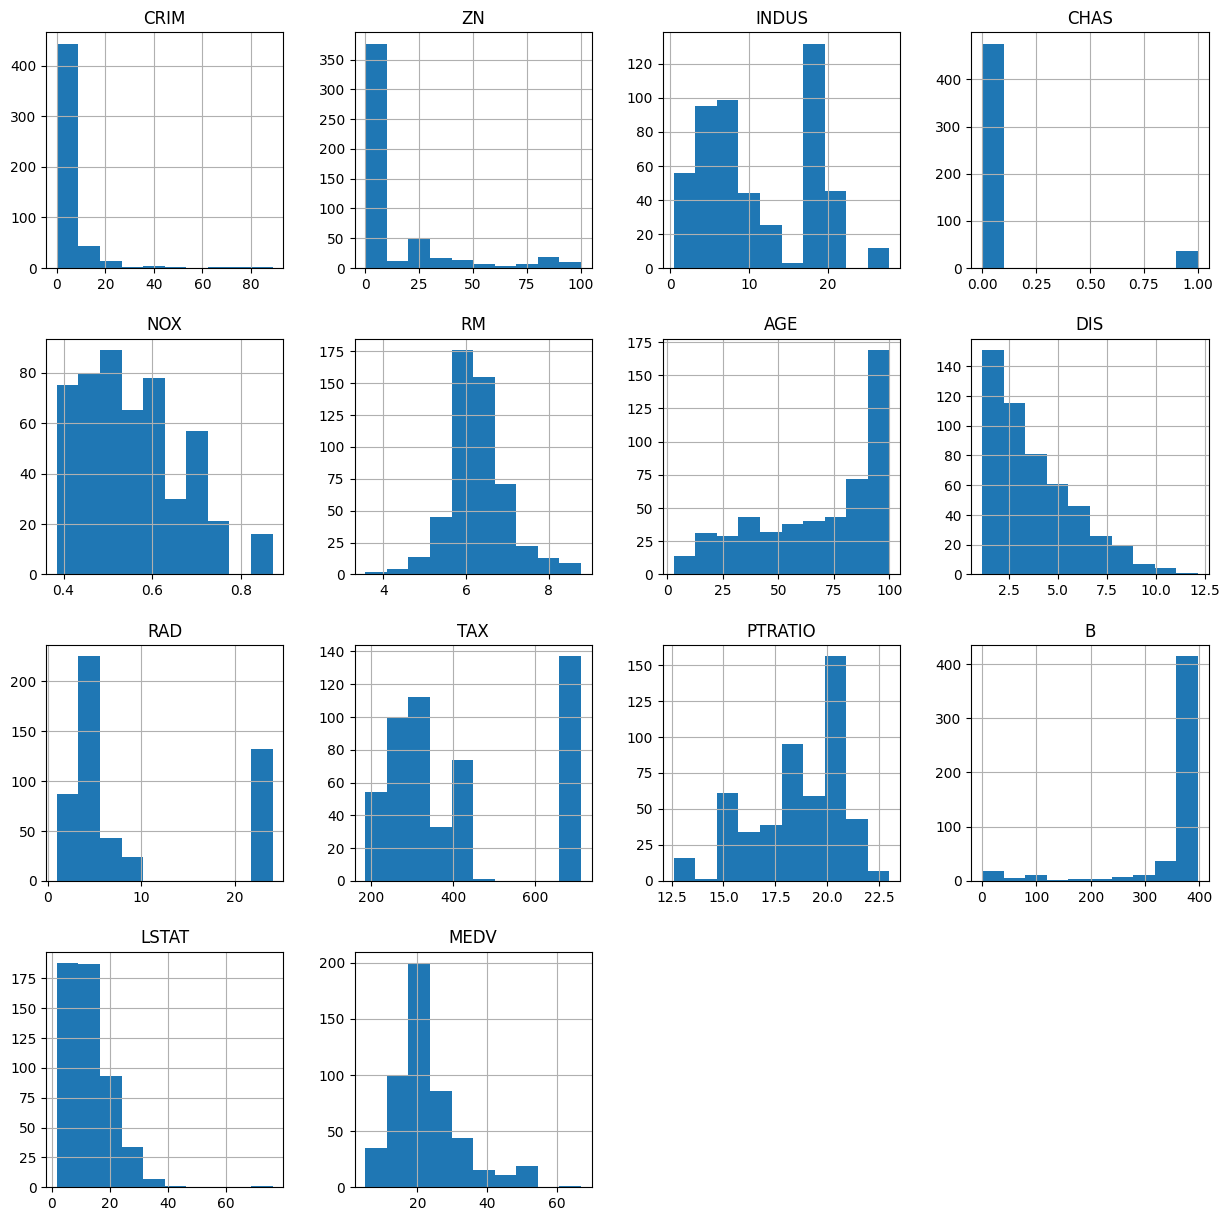

In [20]:
# analysis
df.hist(figsize=(15,15)) # histogram for each numerical value
plt.tight_layout

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

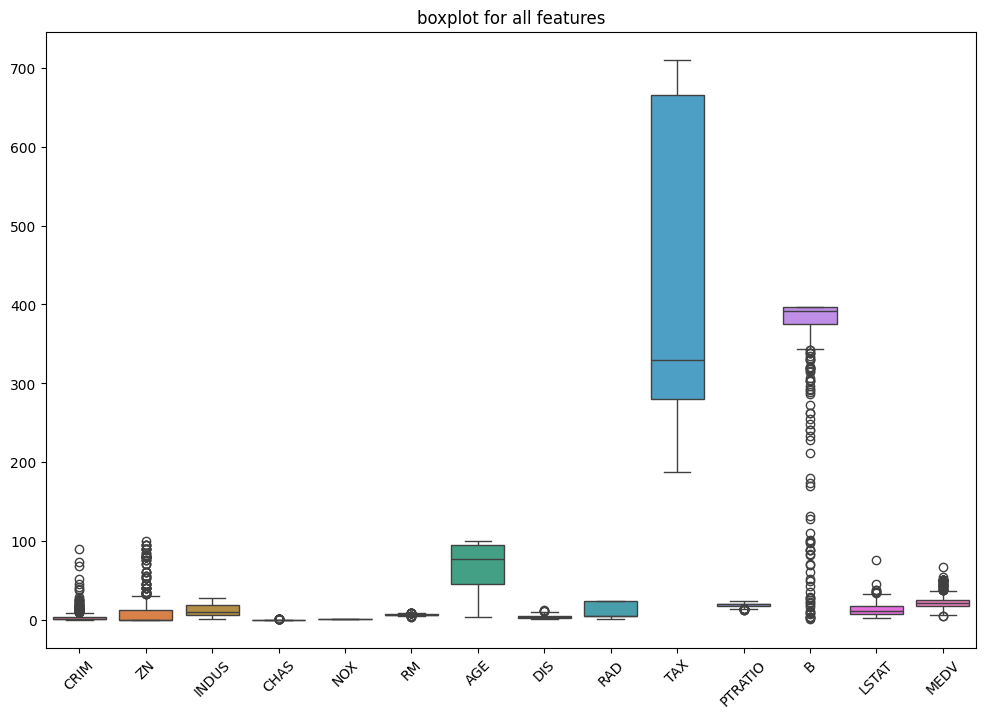

In [21]:
# boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("boxplot for all features")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

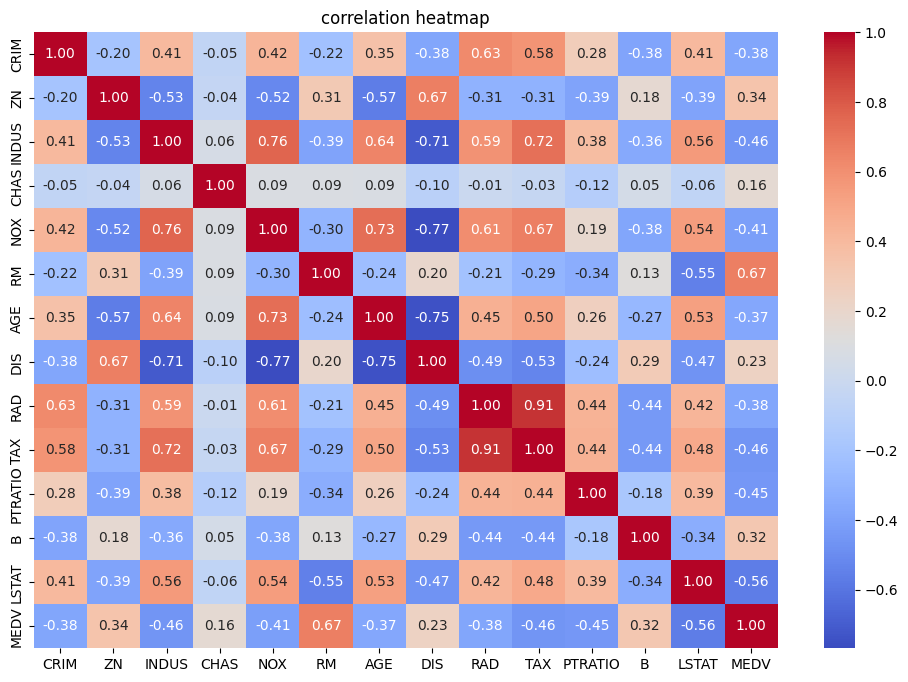

In [22]:
#Correlation Analysis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f" )
plt.title("correlation heatmap")
plt.show

In [23]:
# correlation with MEDV(house price)
print(df.corr()['MEDV'].sort_values(ascending=False))

MEDV       1.000000
RM         0.667261
ZN         0.339767
B          0.317941
DIS        0.233469
CHAS       0.164782
AGE       -0.368203
RAD       -0.379016
CRIM      -0.380072
NOX       -0.411486
PTRATIO   -0.447464
TAX       -0.459274
INDUS     -0.463269
LSTAT     -0.562960
Name: MEDV, dtype: float64


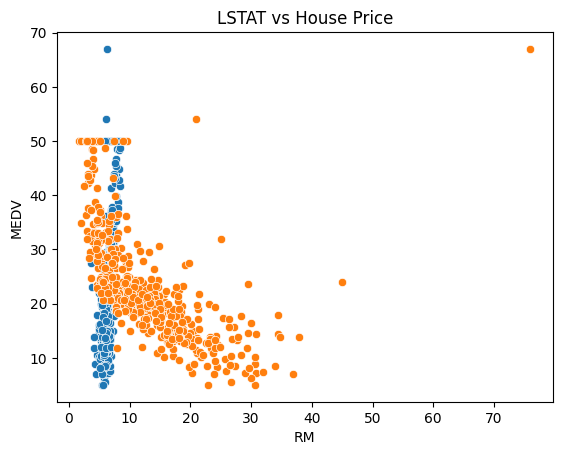

In [24]:

#  with RM (positive correlation expected)
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title("Rooms vs House Price")
# with LSTAT (negative correlation expected)
sns.scatterplot(x='LSTAT', y='MEDV', data=df)
plt.title("LSTAT vs House Price")
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

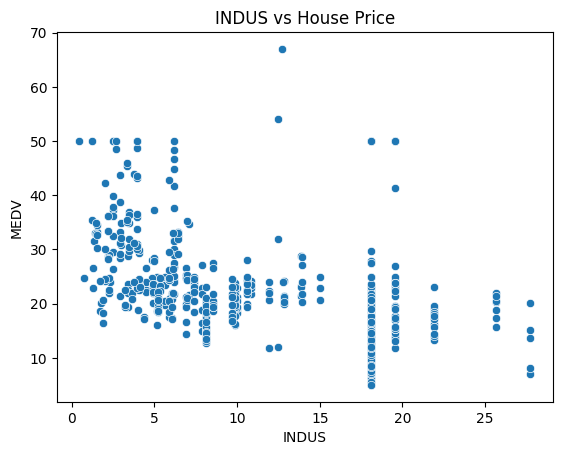

In [25]:
sns.scatterplot(x='INDUS', y='MEDV', data=df)
plt.title("INDUS vs House Price")
plt.show

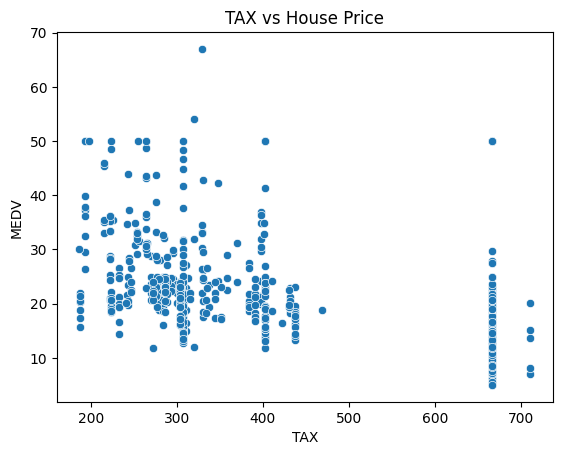

In [26]:
sns.scatterplot(x='TAX', y='MEDV', data=df)
plt.title("TAX vs House Price")
plt.show()

In [27]:
#outlier detection using the Z-score method
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
outliers = (z_scores > 3).sum(axis=0)
print(outliers)


[ 8 14  0 35  0  8  0  5  0  0  0 26  4  2]


In [28]:
df.skew().sort_values(ascending=False)


CRIM       5.249162
CHAS       3.426722
ZN         2.242046
LSTAT      1.808184
MEDV       1.227121
DIS        1.026020
RAD        1.019393
NOX        0.731239
TAX        0.684024
RM         0.398134
INDUS      0.290051
AGE       -0.601268
PTRATIO   -0.730858
B         -2.898598
dtype: float64

In [29]:
df['CRIM'] = np.log1p(df['CRIM'])  # log transform for skewed column
df['ZN'] = np.sqrt(df['ZN'])
df['DIS'] = np.sqrt(df['DIS'])
df['LSTAT'] = np.log1p(df['LSTAT'])
df['B'] = df['B'] ** 2

In [30]:
df.skew().sort_values(ascending=False)


CHAS       3.426722
ZN         1.491510
CRIM       1.282075
MEDV       1.227121
RAD        1.019393
NOX        0.731239
TAX        0.684024
DIS        0.577547
RM         0.398134
INDUS      0.290051
LSTAT     -0.111009
AGE       -0.601268
PTRATIO   -0.730858
B         -2.403213
dtype: float64

# feature selection & modeling

In [31]:
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'DIS', 'CRIM', 'NOX', 'TAX', 'INDUS']
target = 'MEDV'


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
X = df[selected_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
!pip install --upgrade scikit-learn


# with linear regression

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.3132290761023986
RMSE: 7.671928440127291


# with random forest

In [42]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_rf_pred)))

Random Forest R2 Score: 0.6453203521005282
Random Forest RMSE: 5.513364780593019


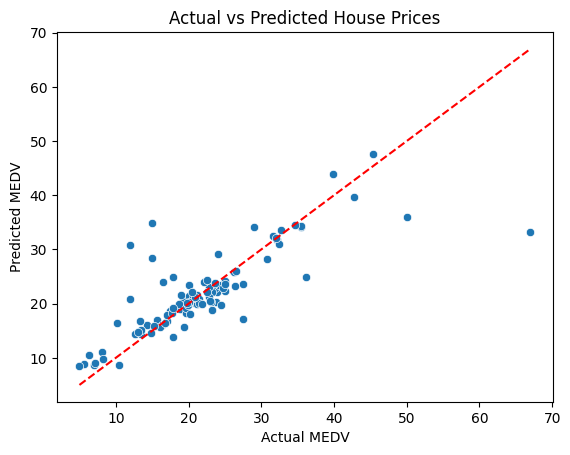

In [43]:
# Predictions vs Actual
sns.scatterplot(x=y_test, y=y_rf_pred)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

In [44]:
import joblib
joblib.dump(rf, "random_forest_model.pkl")


['random_forest_model.pkl']